# All volume indicators

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.volume import AccDistIndexIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.volume import EaseOfMovementIndicator
from ta.volume import ForceIndexIndicator
from ta.volume import MFIIndicator
from ta.volume import NegativeVolumeIndexIndicator
from ta.volume import OnBalanceVolumeIndicator
from ta.volume import VolumePriceTrendIndicator
from ta.volume import VolumeWeightedAveragePrice
import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [16]:
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv") #Default Starting
# df = pd.read_csv("../data/BTCUSDT-hour-target-dip.csv") #dip

# df = pd.read_csv("../data/BTCUSDT-hour-target-features.csv") #Default continuing
df = pd.read_csv("../data/BTCUSDT-minute-target-dip-features.csv") #Continuing minute

# df = pd.read_csv("../data/BTCUSDT-hour-predict.csv") #Prediction
p = "volume_" #change to 'volume_' to have all indicators with prefix 'volume_'

In [17]:
# ADI 🛑

In [18]:
# CMF
cmf = ChaikinMoneyFlowIndicator(df.high, df.low, df.close, df.volume, window=50)
df[p + "cmf_50"] = cmf.chaikin_money_flow()
df[p + "cmf_50_rate_200"] = uf.get_rate(uf.get_moving_average(cmf.chaikin_money_flow(), 200))


In [19]:
# EOM EMV
eom = EaseOfMovementIndicator(df.high, df.low, df.volume, window=50)
df[p + "eom_amplified"] = list(map(lambda x: uf.log_abs(x*10), eom.sma_ease_of_movement()))

In [20]:
# FI
i = ForceIndexIndicator(df.close, df.volume, window=80)
df[p + "fi_amplified"] = list(map(lambda x: uf.log_abs(x*10), i.force_index()))


In [21]:
# MFI
i = MFIIndicator(df.high, df.low, df.close, df.volume, window=50)
df[p + "mfi_50"] = i.money_flow_index()

In [22]:
# NVI
i = NegativeVolumeIndexIndicator(df.close, df.volume)
nvi_o_close = pd.Series(list(map(lambda n, c: n/c, i.negative_volume_index(), df.close)))
df[p + "nvi_o_close_rate_50"] = uf.get_rate(uf.get_moving_average(nvi_o_close, 50))


In [23]:
# OBV 🛑

In [24]:
# VWAP 🛑

In [25]:
# df.to_csv("../data/BTCUSDT-hour-target-features.csv", index=False) #Default
df.to_csv("../data/BTCUSDT-minute-target-dip-features.csv", index=False) #Minute

# df.to_csv("../data/BTCUSDT-hour-predict.csv", index=False) #Prediction

## STOP!

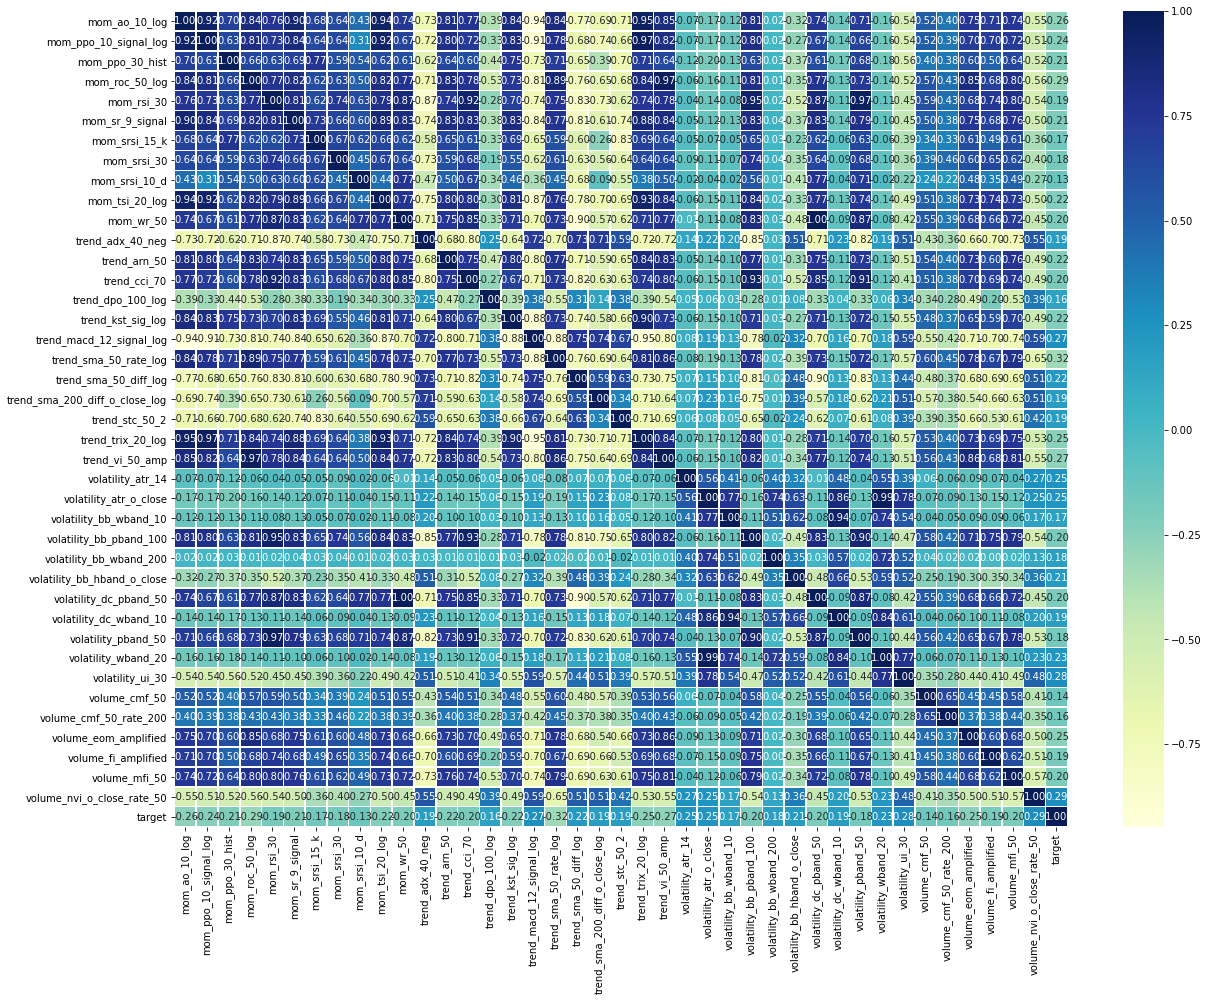

In [12]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [55]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df.copy()
d.dropna(inplace=True)
close = d["close"]
d = d[list(indicators)].copy()

X = d.drop(["target"], axis=1)
y = d["target"]

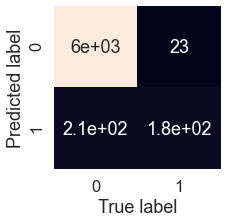

In [56]:
crg.plot_conf_matrix(X, y)

In [57]:
crg.generate_report(X, y)

{'precision': 0.25299147084880613,
 'recall': 0.14109196556479361,
 'f1': 0.11168977914455121}

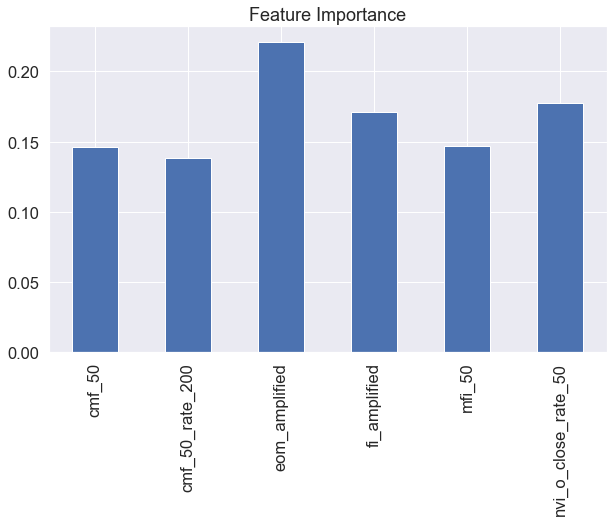

In [58]:
crg.feature_importance(X, y, plot=True)

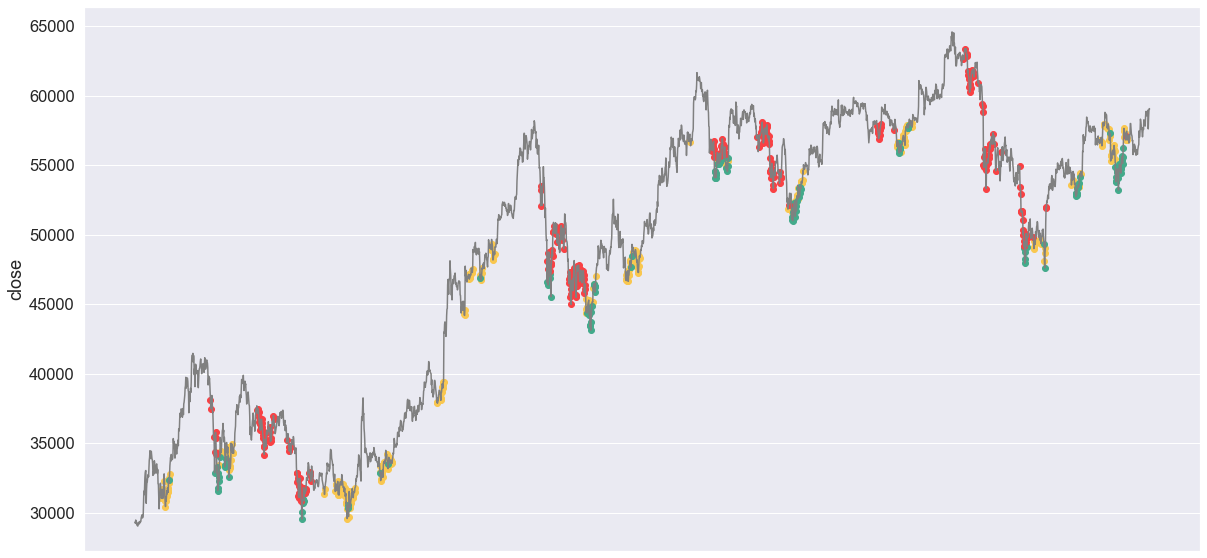

In [59]:
crg.forward_test(X, y, close, mistakes=True)